In [1]:
!pip install sklearn
!pip install numpy
!pip install pandas
!pip install matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [5]:
#INITIALIZATION
valid=len(dataframe[dataframe.Class==0])
fraud=len(dataframe[dataframe.Class==1])
fraud_percent=(fraud/(fraud+valid))*100

print("Geniune Transaction:",valid)
print("Fraud Transactions : ",fraud)
print("Fraud Percentage : ",fraud_percent)

Geniune Transaction: 284315
Fraud Transactions :  492
Fraud Percentage :  0.1727485630620034


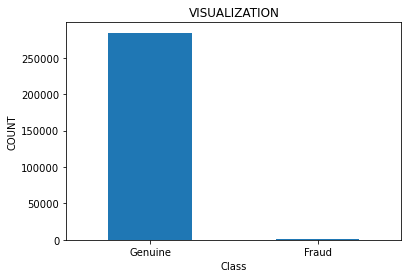

In [6]:
#Visualization
labels=["Genuine","Fraud"]
count_classes=dataframe.value_counts(dataframe['Class'])
count_classes.plot(kind="bar",rot=0)
plt.title("VISUALIZATION")
plt.ylabel("COUNT")
plt.xticks(range(2),labels)
plt.show()

In [7]:
#Data preprocessing
#defining 
X =dataframe.iloc[:,:-1]
Y =dataframe.iloc[:,-1]
#train and test data set declarartion
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of train_X: ", X_train.shape)
print("Shape of test_X: ", X_test.shape)

Shape of train_X:  (227845, 30)
Shape of test_X:  (56962, 30)


In [8]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

predictions_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100
aa=random_forest.score(X_train,Y_train)*100

print("RF Score :",random_forest_score)
print("rf2 score : ",aa)

RF Score : 99.95786664794073
rf2 score :  99.99912221027452


In [9]:
!pip install seaborn

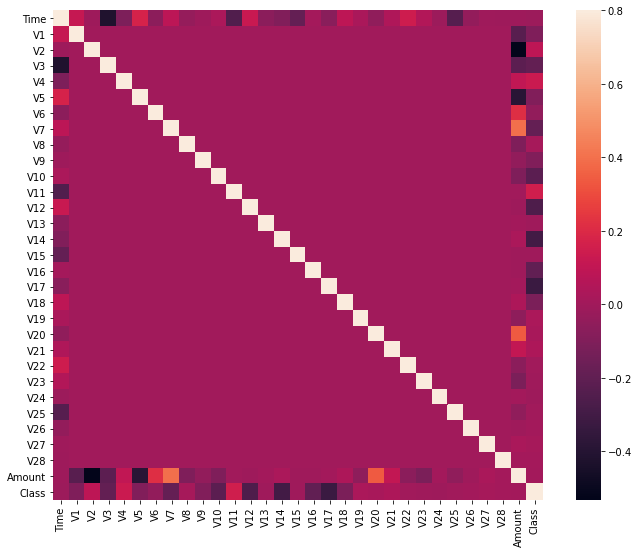

In [10]:
# Correlation matrix
import seaborn as sns
corrmat = dataframe.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [11]:
# dividing the X and the Y from the dataset
X = dataframe.drop(['Class'], axis = 1)
Y = dataframe["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [12]:
confusion_matrix_rf = confusion_matrix(Y_test, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[56862     2]
 [   22    76]]


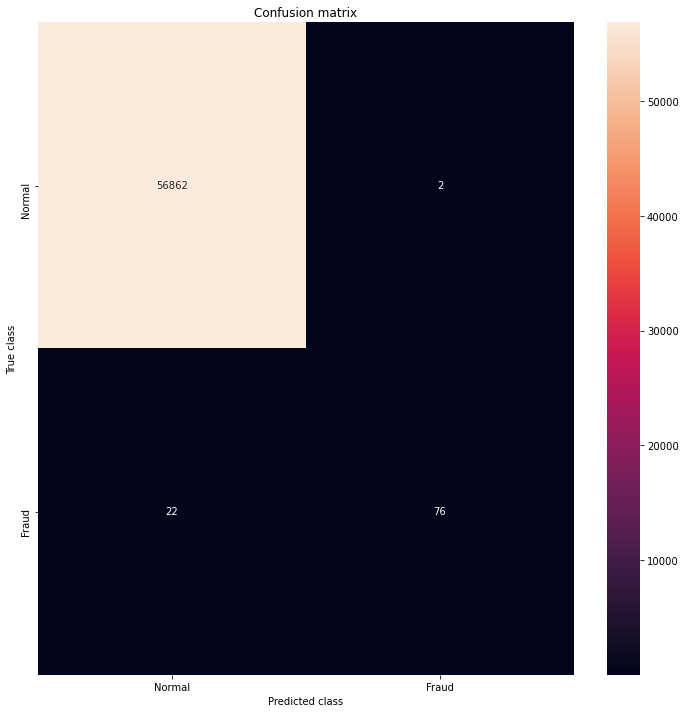

In [13]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, predictions_rf)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [14]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
    
    

In [15]:
print("Evaluation of Random Forest Model")
print()
metrics(Y_test, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99958
Precision: 0.97436
Recall: 0.77551
F1-score: 0.86364


In [16]:
!pip install imblearn

In [17]:
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(X_train, X_test,Y_train,Y_test) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 30)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [ ]:
# Build the Random Forest classifier on the new dataset

rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(X_train, Y_train)

predictions_resampled = rf_resampled.predict(X_test)
random_forest_score_resampled = rf_resampled.score(X_test,Y_test) * 100

In [ ]:
# Visualize the confusion matrix

cm_resampled = confusion_matrix(Y_test, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, predictions_resampled)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion Matrix - Random Forest After Oversampling")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(Y_test, predictions_resampled.round())